# OLG model 

Imports and set magics:

In [1]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. load packages 
import numpy as np
from scipy import optimize
import ipywidgets as widgets

# c. packages and settings for plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# d. local modules
from modelproject import OLGclass, plot_K, plot_C, plot_pi, utility_table, plot_T_B

## Model description

We are very inspired by the OLG from the lectures. Thus we carry the same model forward. This have the followings description.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** A life consists of two periods, *young* and *old*.

**Households:** 
Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms have a Cobb-Douglas production function. 
    
$$
\begin{aligned}
Y_{t} = F(K_{t-1},L_{t})= K_{t-1}^{\alpha} L_{t}^{1-\alpha},\,\,\, \alpha \in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Public consumption is $G_{t}$ and total tax revenue is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}N_{t},\,\ \tau_w \in [0,1], \tau_r \in [0,1]
\end{aligned}
$$
    
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $L_{t}=N_{t}=1$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

### Solution and simulation

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},L_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{L}(K_{t-1},L_{t})=(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.<br>

*Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{L}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

We want to expand with: 
- Population growth  
- Technological growth
- Implement pay as you go (PAYG) scheme
- Look into firm profits, tax revenue and government debt 

## Numerical solution

We start by running the code as in the lecture to make sure it runs. 

In order to implement the most simple model, the initial model take the values: $\theta = 0$ which make the production function Cobb-Douglas, $\sigma = 1$ thus the utility is logarithmic, and $\tau_w = 0$ and $\tau_r = 0$ such the government is passive. 

These values of the parameters are set in the py-file. 

We cant to compare the initial simulation to the analytical steady state. This is given by: 

$$ \lim_{t\rightarrow\infty} K_t = \left(\frac{1-\alpha}{1+1/\beta}\right)^{\frac{1}{1-\alpha}} $$

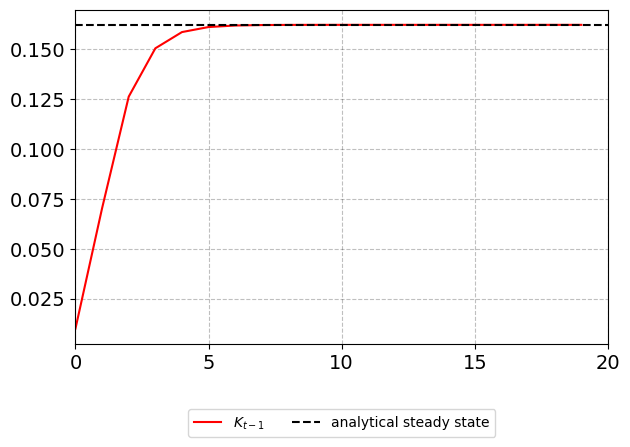

In [2]:
# a. call the class and set par and sim 
model = OLGclass()
par = model.par 
sim = model.sim 

# b. government
sim.balanced_budget[:] = True

# c. simulate model 
model.sim_model()

# d. analytical steady state 
K_analytical = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))

# e. plot the model with 'plot_K' function
plot_K(model.sim.K_lag, K_ss = K_analytical)

# f. save initial K_lag due to comparison 
K_lag_int = model.sim.K_lag.copy()

This is identical to the one from the lectures, hence the code is running in the right way. 

We try another starting value for capital stock, e.g. 1, which is the inital value in the OLGModelClass. 

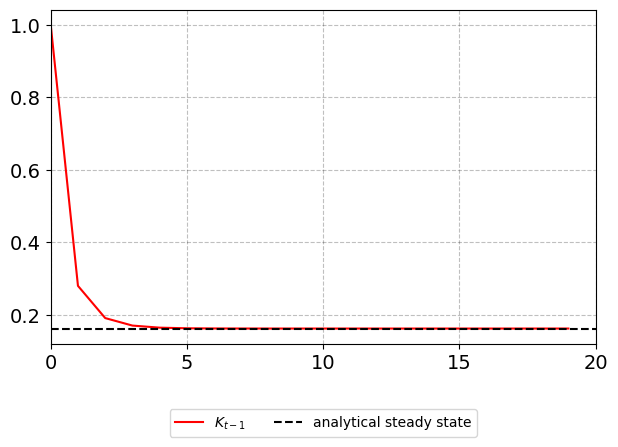

In [3]:
# a. call the class and set par and sim 
model12 = OLGclass()
par = model12.par 
sim = model12.sim 

# b. set starting value for K
par.K_lag_start = 1.0

# c. government
sim.balanced_budget[:] = True

# d. simulate model 
model12.sim_model()

# e. plot the model with 'plot_K' function
plot_K(model12.sim.K_lag, K_ss = K_analytical)

It is seen that the initial capital stock is essential to how $K_{t-1}$ converges.  

### Population growth

We add population growth, such $N_t = 1 + n$. 

Labor maket still clears: $L_t = N_t = 1 + n$

All other parameters are as initially. 

Futher, we set the starting value of $K_{t-1} = 0.01$ in order to be able the compare with the initial plot. 

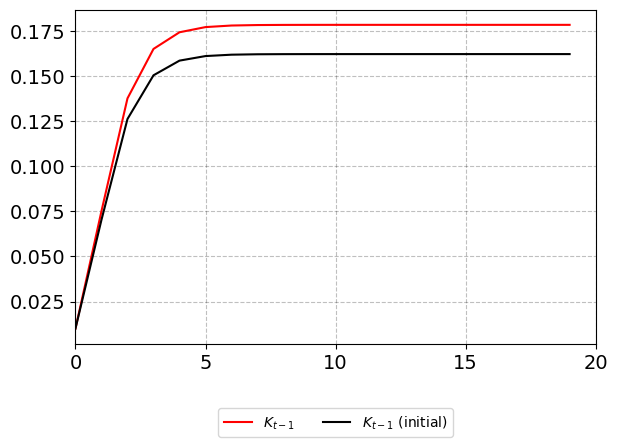

In [4]:
# a. call the class and set par and sim 
model1 = OLGclass()
par = model1.par
sim = model1.sim 

# b. government
sim.balanced_budget[:] = True 

# c. population growth
par.n = 1.1

# d. simulate model 
model1.sim_model()

# e. plot using function 
plot_K(model1.sim.K_lag, K_lag_int = K_lag_int)

# f. save K_lag for comparison 
K_lag_pop = model1.sim.K_lag


We can see from the figure that as population increases thus the accumulated capital increases.

### Technical growth 

We further add technical growth, the production function is then the following: 

$$ Y_t = F(K_{t-1}, AL_t)$$

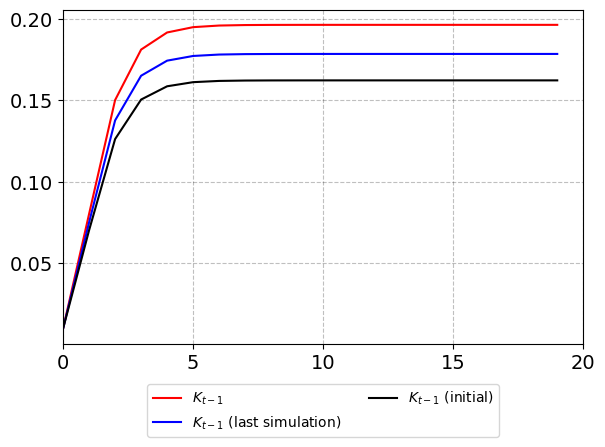

In [5]:
# a. call the class and set par and sim 
model2 = OLGclass()
par = model2.par
sim = model2.sim

# b. government
sim.balanced_budget[:] = True

# c. population and techological growth
par.n = 1.1
par.At = 1.1

# d. simulate model 
model2.sim_model()

# e. plot function 
plot_K(model2.sim.K_lag, K_lag_int = K_lag_int, K_lag_old = K_lag_pop)

# f. save K_lag for comparison 
K_lag_tech = model2.sim.K_lag

It is seen that as techology increases thus the accumulated capital further increases. 

We can further look at the effect on firm profits when the population and the techology grow.

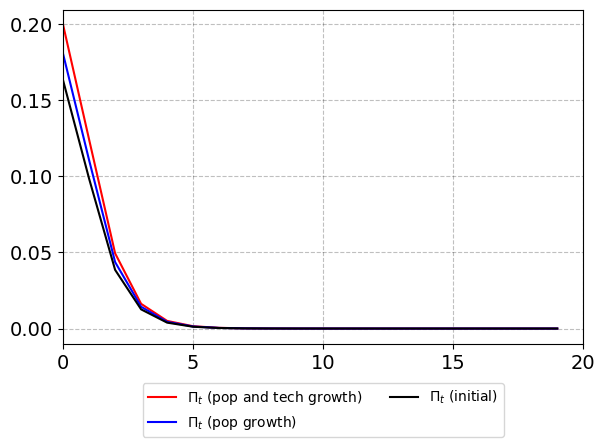

In [6]:
plot_pi(pi_n_At = model2.sim.pi, pi_n = model1.sim.pi, pi_int = model.sim.pi)

We see that the profits are highest from there is population and technology growth and lowset for the initial simulation, but they all decrease to the same steady state of 0. 

### PAYG scheme

We implement PAYG upon the model. Thus, the consumptions for young and old become: 

$$ 
\begin{aligned}
& C_{1t} = (1-s_{t})(1-\tau_{w})w_{t}N_{t} - d\\ 
& C_{2t+1} = (1+(1-\tau_{r})r_{t+1})S_{t} + d
\end{aligned}
$$

As initially, the labour, $L_t$, and pupulation, $N_t$, are normalized to 1. 


/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/modelproject/modelproject.py:239: RuntimeWarning: invalid value encountered in log
  sim.u = np.log(sim.C1[t]) + par.beta*np.log(sim.C2_1[t])


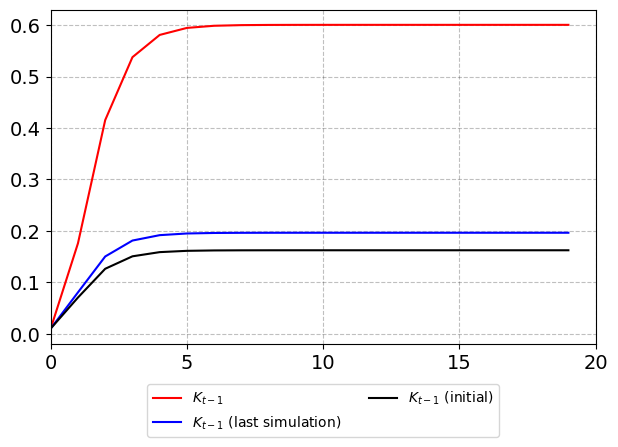

In [7]:
# a. call the class and set par and sim 
model3 = OLGclass()
par = model3.par 
sim = model3.sim 

# b. government
sim.balanced_budget[:] = True # G changes to achieve this

# c. PAYG 
par.d = 0.01

# d. simulate model 
model3.sim_model()

# e. plot function 
plot_K(model3.sim.K_lag, K_lag_int = K_lag_int, K_lag_old = K_lag_tech)


As seen from the figure, implementing PAYG system the $K_{t-1}$ increases very much even for a very low d of 0.00000001. This could maybe be caused by a bug when implementing. 

We further try to look at the consumption of young and old before and after the PAYG. 

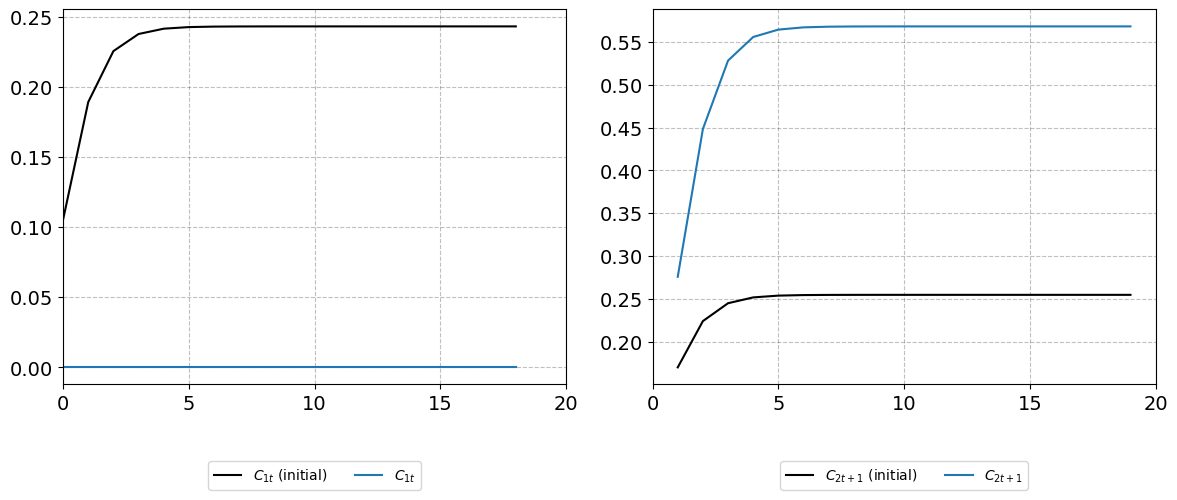

In [8]:
# a. plot consumption for old and young in PAYG compared to initial model
plot_C(C1 = model.sim.C1, C1_2 = model3.sim.C1, C2_1 = model.sim.C2_1, C2_1_2 = model3.sim.C2_1)

From the above plots, it is seen that consumption of young goes from reaching a steady state of almost 0.25 for the initial model. After implementing PAYG the consumption decreases to almost 0. 

It it further observed that the consumption of old increases from a steady state value of around 0.25 to barely 0.6. 

The young then has no consumption while the consumotion of the old increases.

### Active government

We can then add an active government, so we implement a labor income tax, $\tau_w$, of 1%. 

In [9]:
# a. call the class and set par and sim 
model4 = OLGclass()
par = model4.par 
sim = model4.sim 

# b. government
par.tau_w = 0.01
sim.balanced_budget[:] = True

# c. simulate model 
model4.sim_model()

# d. save K_lag for comparison 
K_lag_tau_w = model4.sim.K_lag

We implement a capital income tax, $\tau_r$, of 1% for comparison to  $\tau_w$, of 1% 

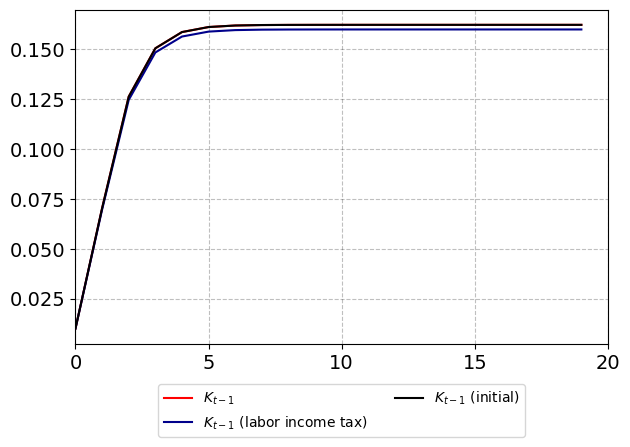

In [10]:
# a. call the class and set par and sim 
model5 = OLGclass()
par = model5.par 
sim = model5.sim 

# b. government
par.tau_r = 0.01
sim.balanced_budget[:] = True

# c. simulate model 
model5.sim_model()

# d. plot function for K_lag_tau_r and K_lag_tau_w
plot_K(model5.sim.K_lag, K_lag_int =  K_lag_int, K_lag_tau = K_lag_tau_w)

From the above we see that the capital income tax does not have much effect on the accumulated capital, while the labor income tax has a small negative effect on $K_{t-1}$.

We can try to look at how the different taxes effect consumption.

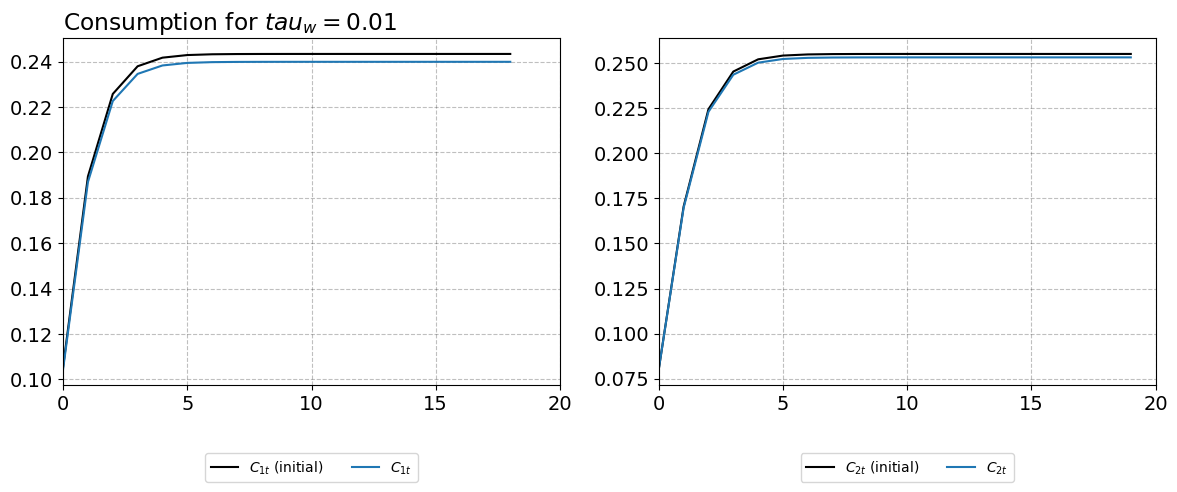

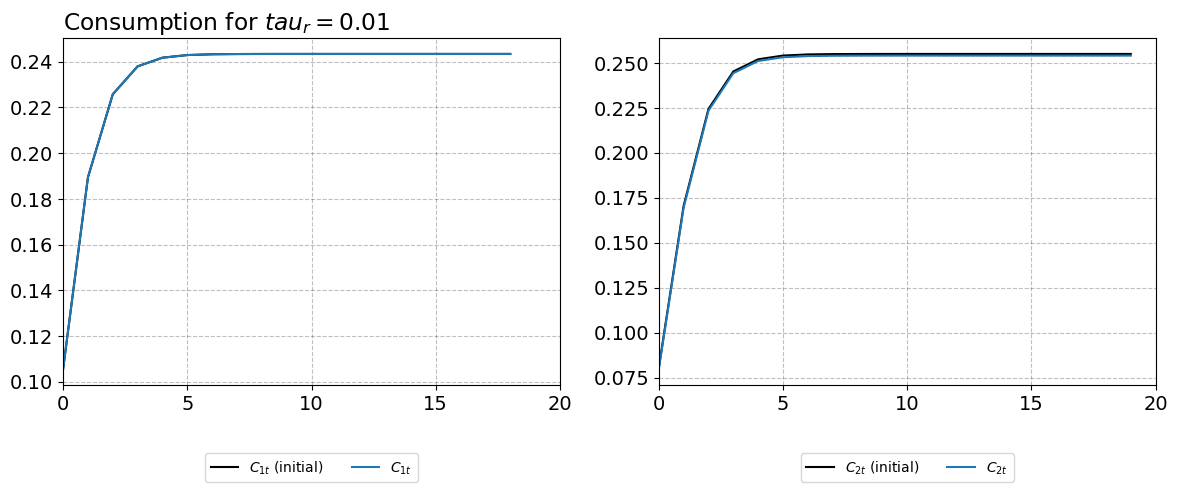

In [11]:
# a. plot consumption for old and young in with tau_w compared to initial model
plot_C(model.sim.C1, model4.sim.C1, model.sim.C2, model4.sim.C2, title = 'Consumption for $tau_w = 0.01$')

# b. plot consumption for old and young in with tau_r compared to initial model
plot_C(model.sim.C1, model5.sim.C1, model.sim.C2, model5.sim.C2, title = 'Consumption for $tau_r = 0.01$')

We see that when the government implements a labor income tax it effects the consumption of the young more negative than the old. 

Looking at the effect of a capital income tax on the consumption we see that it has no effect on the young, but a very small negative effect on the old. 

#### Goverment tax revenue and debt

We can look a how thw goverment debt and tax revenue looks initially, after implementing labor income tax and after implementing capital income tax. 

This is shown in the following plot.

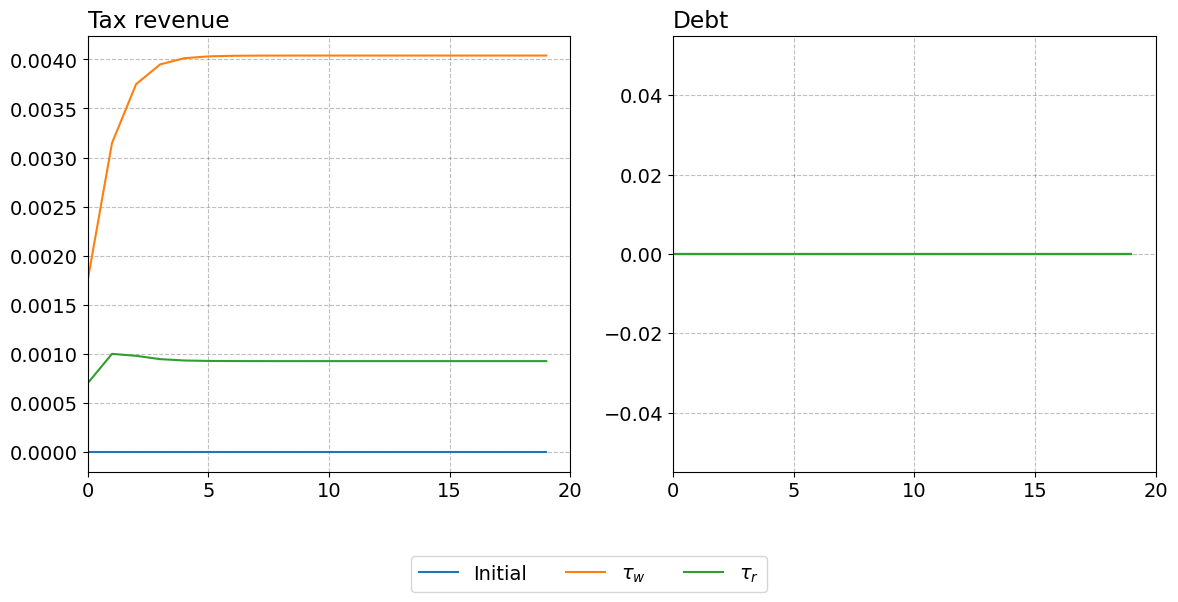

In [12]:
# a. plot tax revenue and government debt
plot_T_B(model.sim.T, model4.sim.T, model5.sim.T, model.sim.B, model4.sim.B, model5.sim.B)

From the above figure on tax renevue, we see that the highest is when implementing a labor income tax. And given that the government is not active in the initial model, the tax revenue is 0. 

If we look at debt, it is seen that it is always 0. This is due to the balanced budget. 

### Utility

We add utility to the simulation. If $\sigma = 1$, then the utility function is logarithmic, and if $\sigma$ is different from 1 then it is of the CRRA form. 

Now the utility is logarithmic. 

So far we have 6 different models. We can then compare the utility of each. 

In [13]:
# a. make a list of all models
model_list = [model, model1, model2, model3, model4, model5]

# b. print the utility for each model using 'utility_table' function
print(utility_table(model_list))

        Utility
Model          
0     -2.324082
1     -2.165232
2     -2.006382
3           NaN
4     -2.343436
5     -2.326511


## Conclusion

To conclude from the above implementation of the OLG model, we see that inital capital stock effects the convergence of the captial stock over time. 

Further, we see that population and technology growth has a positive effect on both capital and profits. Profits return to steady state of 0 either way. 

When implementing the PAYG scheme, we see that it has a great effect on the steady state for capital, and cause the consumption of the young to be almost 0, while the consumption of old increases. 

The results of the active government show that labor income tax has a greater effect on capital as well as the comsumption for both young and old than capital income tax. This effect is the same for tax revenues. Debt are not affected. 

Lastly, the utility of the different models are presented. It is highest for the model with population and technology growth and lowest for the model with labor income tax. 


